- [ ] 绘制 wordnet 和 bert vocab 的共有词的模值分布.

In [1]:
# bert vocab
from transformers import AutoModel, AutoTokenizer

checkpoint = "bert-base-uncased"
bert_model = AutoModel.from_pretrained(checkpoint)

bert_embeddings = bert_model.embeddings.word_embeddings.state_dict()['weight']

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

bert_id2w = {v:k for k, v in tokenizer.vocab.items()}

bert_w2id = tokenizer.vocab

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')

from nltk.corpus import wordnet as wn

lemmas_in_words = set(i for i in wn.words())

In [9]:
len(lemmas_in_words)

147306

In [14]:
bert_vocab = set(bert_w2id.keys())

In [17]:
len(bert_vocab)

30522

In [20]:
common_words = bert_vocab & lemmas_in_words

In [31]:
# 绘制共有词的模值的分布图
import numpy as np
common_words_embeddings = bert_embeddings[tokenizer.convert_tokens_to_ids(common_words)]
common_words_norms = common_words_embeddings.norm(dim=1)

In [34]:
from matplotlib import pyplot as plt
import pandas as pd

In [43]:
# 验证exploited和1.50对应
assert bert_embeddings[tokenizer.convert_tokens_to_ids('exploited')].norm()

In [97]:
word_norm_df = pd.DataFrame({"norms":list(common_words_norms.numpy()), "words":list(common_words)})

In [98]:
word_norm_df

,norms,words
0,1.504637,exploited
1,1.468520,stucco
2,0.982207,southern
3,1.575430,barrio
4,1.459064,humidity
...,...,...
14505,1.262073,biography
14506,1.342552,deacon
14507,1.081511,fully
14508,1.167255,advertising


array([[<AxesSubplot:title={'center':'norms'}>]], dtype=object)

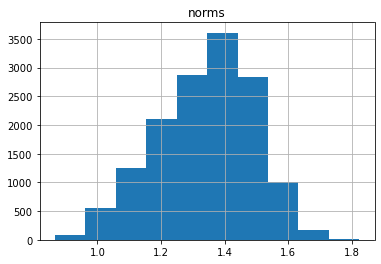

In [99]:
word_norm_df.hist()

In [101]:
word_norm_df.describe()

,norms
count,14510.000000
mean,1.339519
std,0.151899
min,0.866191
25%,1.233141
50%,1.355623
75%,1.452249
max,1.823229


In [102]:
word_norm_df.sample()

,norms,words
9658,1.275341,conduct


In [142]:
word_norm_df['definition'] = word_norm_df.words.apply(lambda x: wn.synsets(x)[0].definition())

In [143]:
word_norm_df['word_ids'] = word_norm_df.words.apply(lambda x: tokenizer.convert_tokens_to_ids(x))

In [144]:
word_norm_df.to_csv('wordnet_bert_common_words.csv', index=None)

In [145]:
word_norm_df.sort_values('embeddings_ids')[:100].describe()

,norms,embeddings_ids,word_ids
count,100.000000,100.000000,100.000000
mean,1.007032,1692.010000,1692.010000
std,0.080373,491.516238,491.516238
min,0.866191,1014.000000,1014.000000
25%,0.952319,1051.750000,1051.750000
50%,1.001923,2030.500000,2030.500000
75%,1.040979,2069.250000,2069.250000
max,1.260403,2108.000000,2108.000000


build dataset

In [146]:
from datasets import load_dataset

In [147]:
common_words_dataset =load_dataset('csv', data_files='./wordnet_bert_common_words.csv')

Using custom data configuration default-61bcd1b6d4c45256


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /diskb/houbowei/.cache/huggingface/datasets/csv/default-61bcd1b6d4c45256/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [149]:
common_words_dataset

DatasetDict({
    train: Dataset({
        features: ['norms', 'words', 'definition', 'embeddings_ids', 'word_ids'],
        num_rows: 14510
    })
})

In [148]:
common_words_dataset['train']['definition']

["use or manipulate to one's advantage",
 'a plaster now made mostly from Portland cement and sand and lime; applied while soft to cover exterior walls or surfaces',
 'in or characteristic of a region of the United States south of (approximately) the Mason-Dixon line',
 'a Spanish-speaking quarter in a town or city (especially in the United States)',
 'wetness in the atmosphere',
 'the decade from 1970 to 1979',
 'small or little relative to something else',
 'the act of determining the properties of something, usually by research or calculation',
 'utter in an angry, sharp, or abrupt tone',
 'a physiological need to drink',
 'a republic in central Europe; split into East Germany and West Germany after World War II and reunited in 1990',
 'the quality of being superior',
 'power to dominate or defeat',
 'a ditch dug as a fortification having a parapet of the excavated earth',
 'having the deep slightly brownish color of gold',
 'fruit with red or yellow or green skin and sweet to tart 